In [4]:
import cv2
import mediapipe as mp

In [5]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [6]:
sample_image = cv2.imread("D:\\facemesh_mediapipe\\img.jpg")

In [7]:
face_mesh_results = face_mesh_images.process(sample_image[:,:,::-1])


In [8]:
import itertools

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

In [9]:
LEFT_EYE_INDEXES[:2], RIGHT_EYE_INDEXES[:2]

([384, 385], [160, 33])

In [10]:
face_landmarks = face_mesh_results.multi_face_landmarks[0].landmark
for leye_index in LEFT_EYE_INDEXES:
    print(face_landmarks[leye_index])

x: 0.5194949
y: 0.28780642
z: 0.016551128

x: 0.52632934
y: 0.28403687
z: 0.016055286

x: 0.53341115
y: 0.28283525
z: 0.016781539

x: 0.5407553
y: 0.28498092
z: 0.01888611

x: 0.54560554
y: 0.28890598
z: 0.02142964

x: 0.5443615
y: 0.29978544
z: 0.020902913

x: 0.5504831
y: 0.29465824
z: 0.027245311

x: 0.5128203
y: 0.29644385
z: 0.017805224

x: 0.5148572
y: 0.29312298
z: 0.017435001

x: 0.5483729
y: 0.2919573
z: 0.023952685

x: 0.539524
y: 0.3012941
z: 0.01777871

x: 0.53243315
y: 0.30214876
z: 0.015223504

x: 0.5476473
y: 0.29775783
z: 0.023710633

x: 0.52549934
y: 0.30142838
z: 0.014631416

x: 0.5190727
y: 0.29942745
z: 0.015662298

x: 0.5149007
y: 0.29807276
z: 0.017592005



In [11]:
def drawContours(image, landmarks):
    mp_drawing.draw_landmarks(image=image,
                            landmark_list=landmarks,
                            landmark_drawing_spec=None,                          
                            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style(),
                            connections=mp_face_mesh.FACEMESH_CONTOURS)
    return image

In [12]:
def drawTessalation(image, landmarks):
    mp_drawing.draw_landmarks(image=image,
                            landmark_list=landmarks,
                            landmark_drawing_spec=None,                          
                            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
                            connections=mp_face_mesh.FACEMESH_TESSELATION)
    return image

In [ ]:
def draw_coordinates(iamge, coordinates):
    # TODO: draw coordinates in @coordinates list
    pass

In [13]:
_copy = sample_image[:,:,::-1].copy()
_copy = drawTessalation(image=_copy, landmarks=face_mesh_results.multi_face_landmarks[0])
_copy = drawContours(image=_copy, landmarks=face_mesh_results.multi_face_landmarks[0])

<function matplotlib.pyplot.show(close=None, block=None)>

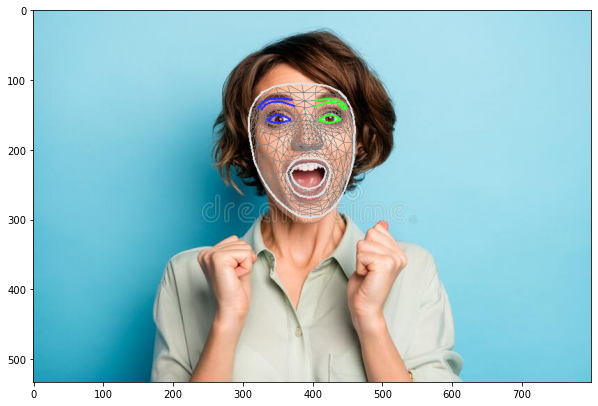

In [14]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=[10, 10])
plt.imshow(_copy)
plt.show

Live video face mesh implementation using MediaPipe

In [16]:
cam = cv2.VideoCapture(0)
while cam.isOpened():
    success, image = cam.read()
    face_mesh_result = face_mesh_images.process(image)
    _copy = image.copy()
    # _copy = drawContours(image=_copy, landmarks=face_mesh_result.multi_face_landmarks[0])
    _copy = drawTessalation(image=_copy, landmarks=face_mesh_result.multi_face_landmarks[0])
    _copy 
    cv2.imshow("image", _copy)
    if cv2.waitKey(5) & 0xFF == 27:
        cv2.destroyWindow("image")
        break
cam.release()